Name: NUR AMNI QISTINA BINTI MUHAMMAD ZAWAWI

ID: TG19022

Object: VEGETABLE

# --------- Question 1 answers start here -------------------

```
# Step 1-5 are my suggestion, you can modify/add more step if needed
```

**Step 1: Display your image here (using plt or cv2 image show)**

Vegetable used for this image processing is **Pea**.

In [1]:
!pip install --upgrade scikit-image

     |████████████████████████████████| 29.2MB 137kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


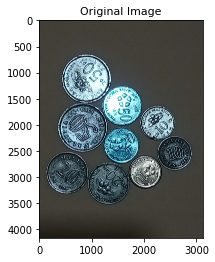

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/IMG20210517225340.jpg")
plt.title(label="Original Image",
          fontsize=11,
          color="black")
plt.imshow(img, cmap='gray')

**Step 2: Apply pre-procesing / enhancement**

Before filtering, pre - processing is important to reduce noise and enhance image to get a better image for filtering. Histogram equalization and median filter are used to enhance the object in this image.

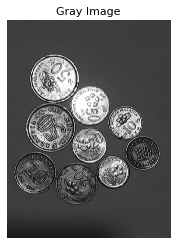

In [35]:
from skimage import color

gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.title(label="Gray Image",
          fontsize=11,
          color="black")
plt.imshow(gray, cmap='gray')

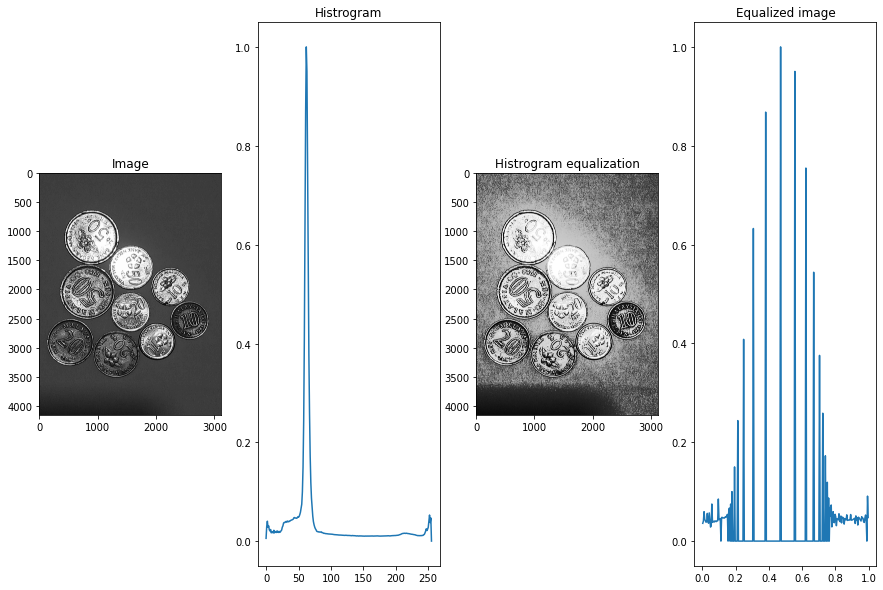

In [36]:
from skimage import exposure

f, axes = plt.subplots(1, 4, figsize=(15, 10))

axes[0].set_title('Image')
axes[1].set_title('Histrogram')
axes[2].set_title('Histrogram equalization')
axes[3].set_title('Equalized image')

axes[0].imshow(gray, cmap='gray')

img_hist0, bins0 = exposure.histogram(gray)

axes[1].plot(bins0, img_hist0 / img_hist0.max())

histeq_pea = exposure.equalize_hist(gray)
axes[2].imshow(histeq_pea, cmap='gray')

eq_img_hist0, eq_bins0 = exposure.histogram(histeq_pea)
axes[3].plot(eq_bins0, eq_img_hist0 / eq_img_hist0.max())

plt.show()

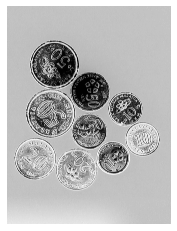

In [37]:
neg_pea = 255 - gray
plt.axis('off')
plt.imshow(neg_pea, cmap='gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


Text(0.5, 1.0, 'Median filter')

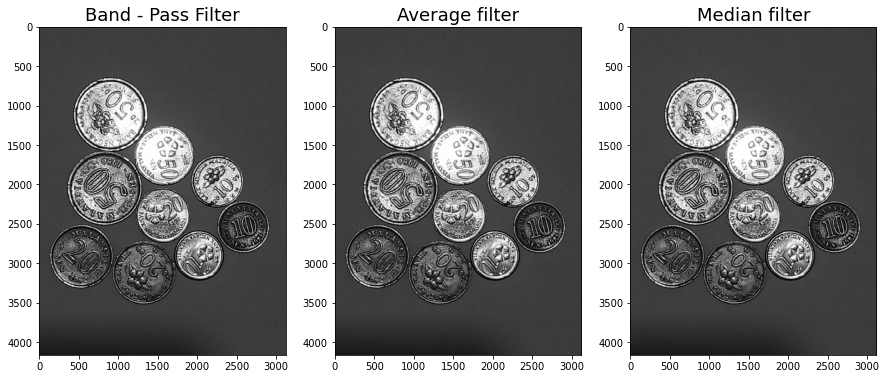

In [38]:
from skimage.color import rgb2gray
from skimage.filters.rank import mean, median
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

img_pea = rgb2gray(gray)

avg = mean(img_pea, disk(3)) #adjust 1,2,3...
med = median(img_pea, disk(5)) #adjust 1,2,3...

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15))

ax0.imshow(img_pea, cmap='gray')
ax0.set_title('Band - Pass Filter', fontsize=18)

ax1.imshow(avg, cmap='gray')
ax1.set_title('Average filter', fontsize=18)

ax2.imshow(med, cmap='gray')
ax2.set_title('Median filter', fontsize=18)

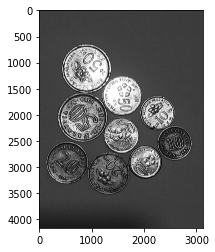

In [39]:
blur = cv2.GaussianBlur(med, (11,11), 0)
plt.imshow(blur, cmap ='gray')

**Step 3: Apply color filter**

Before thresholding, object must be separated from background. This is only possible by applying color filter. Hue thresholding is used to mask object.

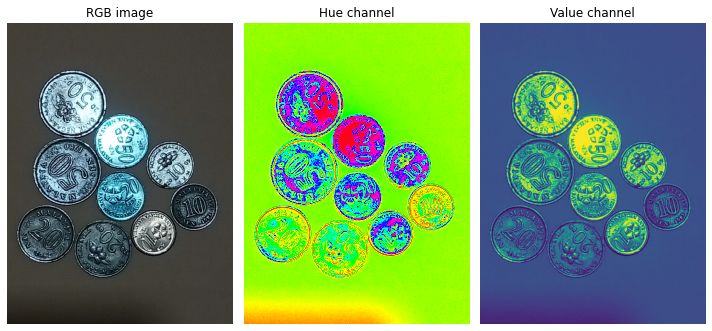

In [40]:
from skimage.color import rgb2hsv, gray2rgb

rgb_img = gray2rgb(blur)
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 2]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10, 10))

ax0.imshow(img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

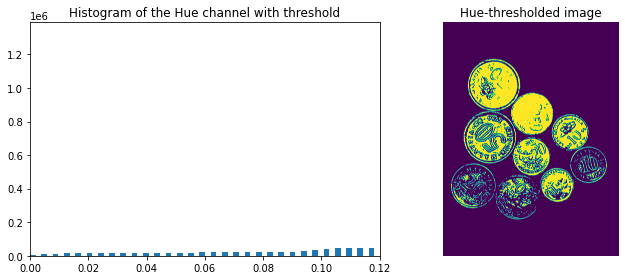

In [44]:
hue_threshold = 0.4
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

**Step 4: Apply segmentation**

Now that we have mask the object, apply segmentation before applying morphological image processing to produce better image.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 1.0, 'SAUVOLA')

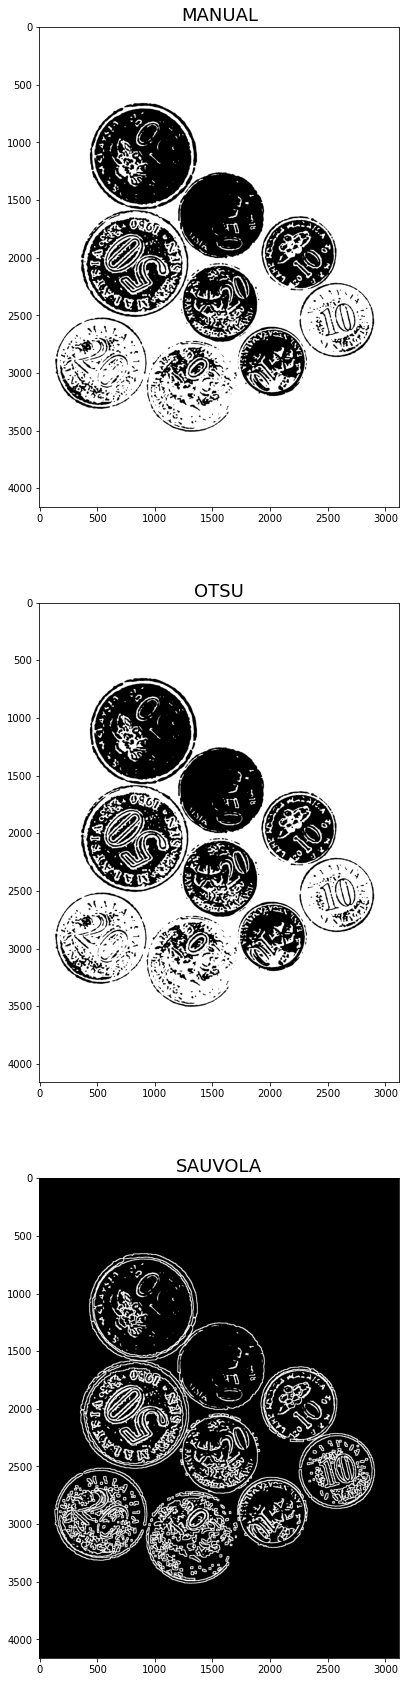

In [46]:
from skimage import filters

#gray1 = rgb2gray(binary_img)
#my_gray = binary_img @ [0.2126, 0.7152, 0.0722]
#my_gray2 = binary_img[:,:,0] * 0.2126 + binary_img[:,:,1] * 0.7152 + binary_img[:,:,2] * 0.0722

text_threshold0 = 0.4
text_threshold1 = filters.threshold_otsu(binary_img)
text_threshold2 = filters.threshold_sauvola(binary_img)

f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(30, 30))

try1 = binary_img < text_threshold0
try2 = binary_img < text_threshold1
try3 = binary_img < text_threshold2

ax0.imshow(try1, cmap='gray')
ax0.set_title('MANUAL', fontsize=18)

ax1.imshow(try2, cmap='gray')
ax1.set_title('OTSU', fontsize=18)

ax2.imshow(try3, cmap='gray')
ax2.set_title('SAUVOLA', fontsize=18)

**Step 5: Morphology**

From the segmented image, there are few holes and distorted background on the right side of the image. Morphological image processing is used to eliminate these holes and mask the object perfectly. Disk shape is used since the object has round - shape like feature (semi - circle).

In [49]:
from skimage.morphology import opening, closing
from skimage.morphology import disk

selem = disk(5)

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

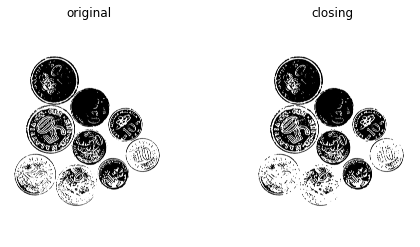

In [50]:
closed = closing(try2, selem)
plot_comparison(try2, closed, 'closing')

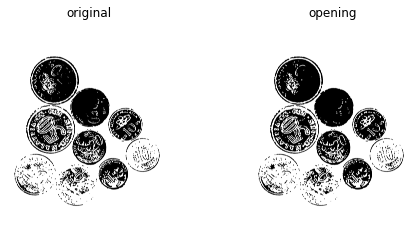

In [51]:
opened = opening(closed, selem)
plot_comparison(closed, opened, 'opening')

# --------- Question 2 answers start here -------------------

```
# Step 1-2 are my suggestion, you can modify/add more step if needed
```

**Step 1: Display your image here (using plt or cv2 image show)**

The nutritional information image is shown below using plt command.

In [ ]:
text = cv2.imread("/content/IMG20210525140116.jpg")
plt.axis('off')
plt.title(label="Original Image",
          fontsize=11,
          color="black")
plt.imshow(text)

**Step 2: Apply pre-procesing / enhancement / color conversion**

In order to enhance image, histogram equalization is used.

In [ ]:
gray1 = color.rgb2gray(text)

f, axes = plt.subplots(1, 4, figsize=(15, 10))

axes[0].set_title('Image')
axes[1].set_title('Histrogram')
axes[2].set_title('Histrogram equalization')
axes[3].set_title('Equalized image')

axes[0].imshow(gray1, cmap='gray')

img_hist1, bins1 = exposure.histogram(gray1)

axes[1].plot(bins1, img_hist1 / img_hist1.max())

histeq_text = exposure.equalize_hist(gray1)
axes[2].imshow(histeq_text, cmap='gray')

eq_img_hist1, eq_bins1 = exposure.histogram(histeq_text)
axes[3].plot(eq_bins1, eq_img_hist1 / eq_img_hist1.max())

plt.show()

**Step 3: Apply image thresholding**

Comparing thress types of thresholding, manual threshold able to show text better.

In [ ]:

my_gray = text @ [0.2126, 0.7152, 0.0722]
my_gray2 = text[:,:,0] * 0.2126 + text[:,:,1] * 0.7152 + text[:,:,2] * 0.0722


text_threshold0 = 100
text_threshold1 = filters.threshold_otsu(my_gray2)
text_threshold2 = filters.threshold_sauvola(my_gray2)

f, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(30, 30))

text1 = my_gray2 < text_threshold0
text2 = my_gray2 < text_threshold1
text3 = my_gray2 < text_threshold2

ax0.imshow(text1, cmap='gray')
ax0.set_title('MANUAL', fontsize=18)

ax1.imshow(text2, cmap='gray')
ax1.set_title('OTSU', fontsize=18)

ax2.imshow(text3, cmap='gray')
ax2.set_title('SAUVOLA', fontsize=18)